<h1> Detector de Fraudes em Cartões de Créditos </h1>

<p>
Neste kernel, o autor aborda a detecção de fraudes em transações de crédito usando diversos modelos preditivos. O autor começa entendendo os dados disponíveis e cria uma sub-amostra balanceada de transações fraudulentas e não fraudulentas. Em seguida, realiza a pré-processamento dos dados, incluindo a escalonamento e distribuição das features, além de dividir os dados em conjuntos de treinamento e teste. O autor também explora a distribuição e correlação dos dados, realiza detecção de anomalias, redução de dimensionalidade e clustering usando t-SNE. Diversos classificadores são testados, com ênfase em regressão logística, incluindo uma análise mais aprofundada deste modelo. O autor também discute a importância de corrigir erros comuns em conjuntos de dados desbalanceados, como não testar em conjuntos de dados oversampled ou undersampled, aplicar oversampling ou undersampling durante a validação cruzada, e não usar a acurácia como métrica principal. O autor faz referências a materiais de apoio, incluindo um livro e notebooks do Kaggle.
</p>

In [1]:
# Importando módulos necessários
import pandas as pd # Análise e manipulação de dados
import numpy as np # Álgebra Linear
import matplotlib.pyplot as plt # Configuração e Criação de Gráficos
import seaborn as sns # Criação de Gráficos
import warnings # Avisos
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/joeldspy/Modelos/datasets/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Boas notícias! sem dados nulos
df.isna().sum().sum()

0

In [5]:
_ = pd.value_counts(df['Class'])
print('Na nossa base da dados, %.2f%% dos REGISTROS são classificados como NÃO FRAUDES' % (_[0]/len(df) * 100))
print('Na nossa base da dados, %.2f%% dos REGISTROS são classificados como FRAUDES' % (_[1]/len(df) * 100))

Na nossa base da dados, 99.83% dos REGISTROS são classificados como NÃO FRAUDES
Na nossa base da dados, 0.17% dos REGISTROS são classificados como FRAUDES


**Aviso:** Repare como o nosso conjunto de dados original está desequilibrado! A maioria das transações não são fraudes. Se usarmos esse conjunto de dados como base para nossos modelos preditivos e análises, podemos obter muitos erros e nossos algoritmos provavelmente ficarão superajustados, pois vão "assumir" que a maioria das transações não são fraudes. Mas não queremos que nosso modelo assuma, queremos que ele detecte padrões que indiquem fraudes!

Text(0.5, 1.0, 'Distribuição de Classes \n (0 : Não-fraude || 1 : Fraude)')

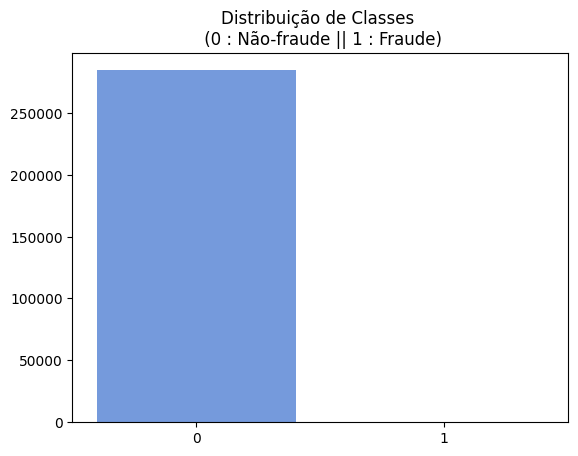

In [6]:
colors = ['#6495ED','#FF7F7F']
sns.barplot(x=_.index, y=_.values, palette=colors)
plt.title('Distribuição de Classes \n (0 : Não-fraude || 1 : Fraude)')

**Distribuições:** Ao observar as distribuições, podemos ter uma ideia de quão assimétricas são essas características, e também podemos ver as distribuições das outras características. Existem técnicas que podem ajudar a reduzir a assimetria das distribuições, as quais serão implementadas neste notebook no futuro.

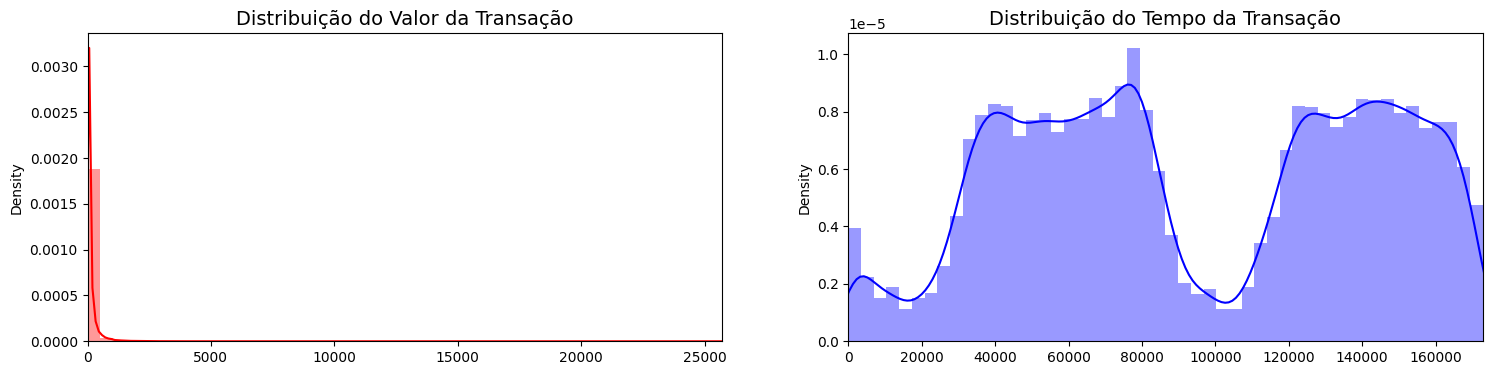

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_values = df['Amount'].values
time_values = df['Time'].values

sns.distplot(amount_values, ax=ax[0], color='r')
ax[0].set_title('Distribuição do Valor da Transação', fontsize=14)
ax[0].set_xlim([min(amount_values), max(amount_values)])

sns.distplot(time_values, ax=ax[1], color='b')
ax[1].set_title('Distribuição do Tempo da Transação', fontsize=14)
ax[1].set_xlim([min(time_values), max(time_values)])

plt.show()

<h2>Dimensionando e Distribuindo</h2>
<a id="distributing"></a>
Nesta fase do nosso notebook, iremos primeiro dimensionar as colunas que compõem o <b>Tempo</b> e o <b>Valor da Transação</b>. O tempo e o valor da transação devem ser dimensionados como as outras colunas. Por outro lado, precisamos também criar uma sub-amostra do dataframe para ter uma quantidade igual de casos de fraude e não fraude, ajudando nossos algoritmos a entenderem melhor os padrões que determinam se uma transação é uma fraude ou não.
<h3>O que é uma sub-amostra?</h3>
Neste cenário, nossa sub-amostra será um dataframe com uma proporção de 50/50 de transações de fraude e não fraude. Isso significa que nossa sub-amostra terá a mesma quantidade de transações de fraude e não fraude.
<h3>Por que criamos uma sub-amostra?</h3>
No início deste notebook, vimos que o dataframe original estava fortemente desequilibrado! Usar o dataframe original causará os seguintes problemas:
<ul>
<li><b>Sobreajuste:</b> Nossos modelos de classificação vão assumir que na maioria dos casos não há fraudes! O que queremos é que nosso modelo seja preciso quando uma fraude ocorre.</li>
<li><b>Correlações incorretas:</b> Embora não saibamos o que as características "V" representam, será útil entender como cada uma dessas características influencia o resultado (fraude ou não fraude) ao ter um dataframe desequilibrado não podemos ver as verdadeiras correlações entre a classe e as características.</li>
</ul>
<h3>Resumo:</h3>
<ul>
<li><b>Valor da Transação dimensionado</b> e <b>Tempo dimensionado</b> são as colunas com valores dimensionados.</li>
<li>Há <b>492 casos</b> de fraude em nosso conjunto de dados, então podemos aleatoriamente obter 492 casos de não fraude para criar nosso novo sub-dataframe.</li>
<li>Nós concatenamos os 492 casos de fraude e não fraude, <b>criando uma nova sub-amostra</b>.</li>
</ul>

In [8]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(columns=['Amount', 'Time'], inplace=True)

In [9]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# O tempo e o montante estão escalados!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [10]:
fraud_df = df.query('Class == 1')
no_fraud_df = df.query('Class == 0')[:492]

normal_distributed_df = pd.concat([fraud_df, no_fraud_df])
normal_distributed_df

new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.179976,-1.994962,-0.427191,0.745708,1.761811,-0.165130,0.058298,-0.213413,0.647323,0.073464,...,0.052828,-0.201681,-0.432070,0.013164,0.161606,-0.401310,0.047423,0.102549,-0.116571,0
248296,-0.307413,1.243705,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
239,-0.027947,-1.993214,1.171439,0.474974,0.011761,1.264303,0.116234,-0.865986,0.554393,-0.276375,...,-0.119439,0.070051,0.278843,-0.097491,0.426278,0.744938,-0.274728,0.008472,0.015492,0
239501,3.007895,1.165033,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,...,-1.928527,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1
143336,3.226717,-0.200658,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,...,0.135711,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1


Distribuição de classes da nova base de dados:
0    0.5
1    0.5
Name: Class, dtype: float64


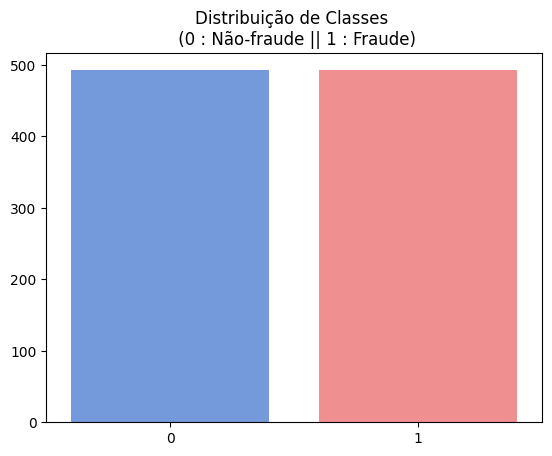

In [12]:
_ = pd.value_counts(new_df['Class'])
sns.barplot(x=_.index, y=_.values, palette=colors)
plt.title('Distribuição de Classes \n (0 : Não-fraude || 1 : Fraude)')

print('Distribuição de classes da nova base de dados:')
print(_/len(new_df))

<h3> Matrizes de Correlação </h3>
As matrizes de correlação são essenciais para entender nossos dados. Queremos saber se existem características que influenciam fortemente se uma transação específica é uma fraude. No entanto, é importante que usemos o dataframe correto (subamostra) para que possamos ver quais características têm alta correlação positiva ou negativa em relação às transações fraudulentas.

### Resumo e Explicação:
<ul>
<li><b>Correlações Negativas: </b> V17, V14, V12 e V10 têm correlação negativa. Observe como quanto menor esses valores, mais provável será que o resultado final seja uma transação fraudulenta.</li>
<li><b>Correlações Positivas: </b> V2, V4, V11 e V19 têm correlação positiva. Observe como quanto maior esses valores, mais provável será que o resultado final seja uma transação fraudulenta.</li>
<li><b>BoxPlots: </b> Usaremos boxplots para entender melhor a distribuição dessas características em transações fraudulentas e não fraudulentas.</li>
</ul>
Nota: Devemos ter certeza de usar a subamostra em nossa matriz de correlação, caso contrário, nossa matriz de correlação será afetada pelo alto desequilíbrio entre as classes. Isso ocorre devido ao desequilíbrio de classes no dataframe original.

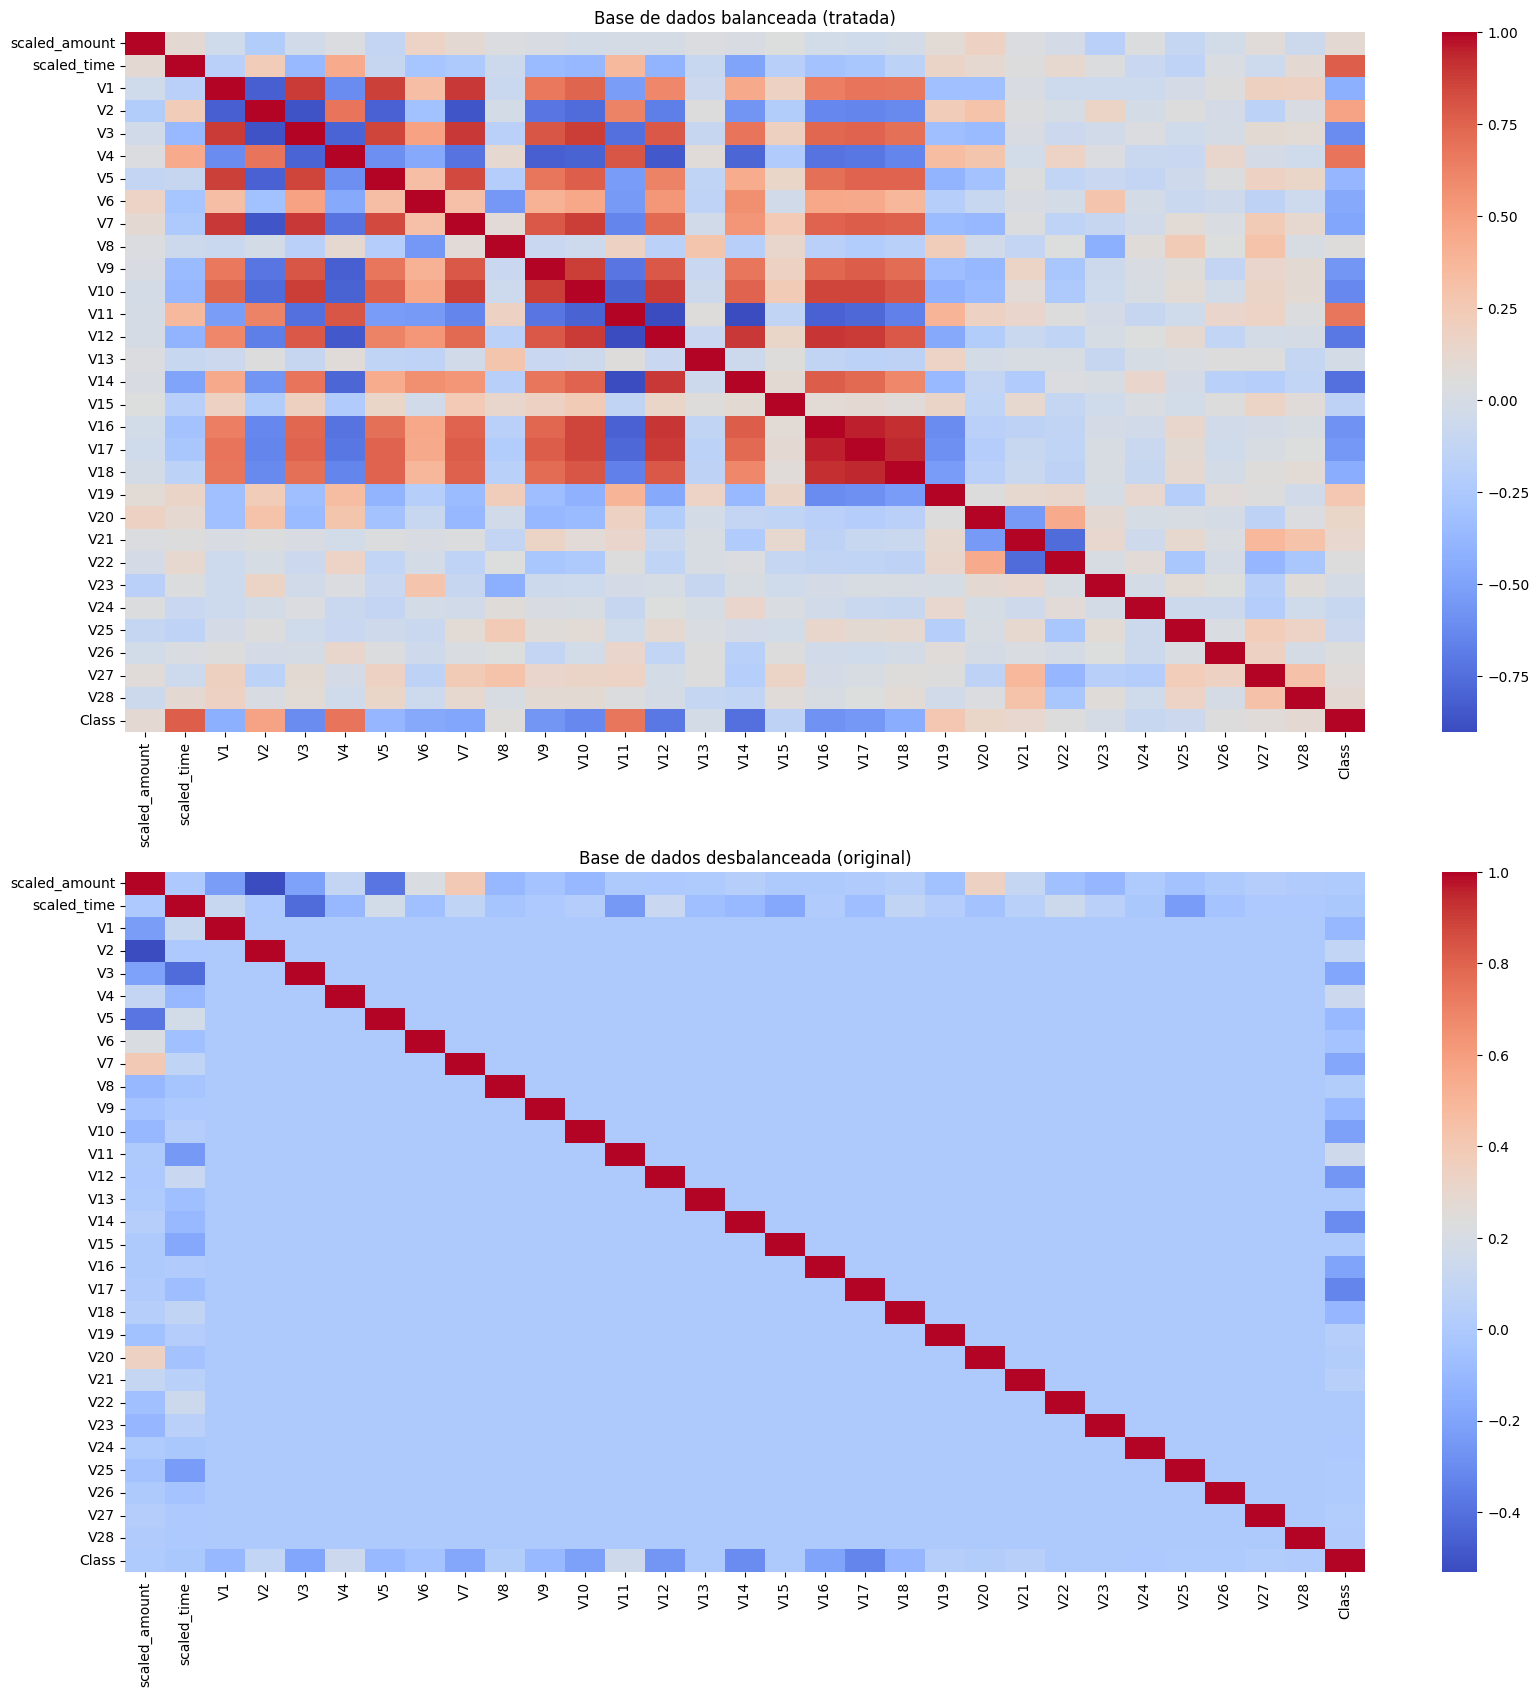

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))

sns.heatmap(new_df.corr(), cmap='coolwarm', ax=ax1)
ax1.set_title('Base de dados balanceada (tratada)')

sns.heatmap(df.corr(), cmap='coolwarm', ax=ax2)
ax2.set_title('Base de dados desbalanceada (original)')

plt.show()

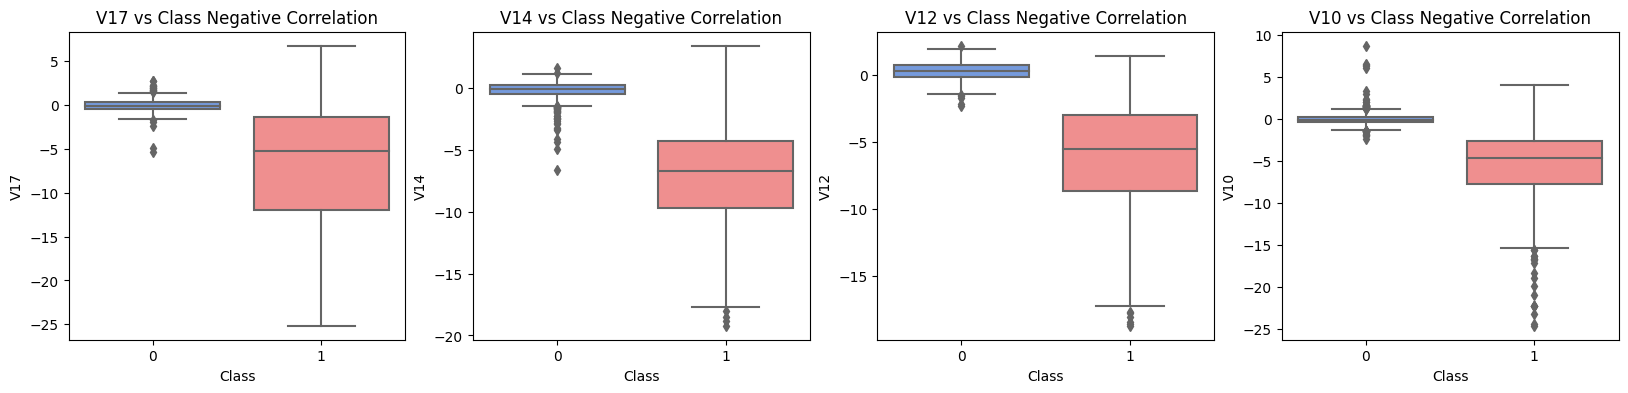

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

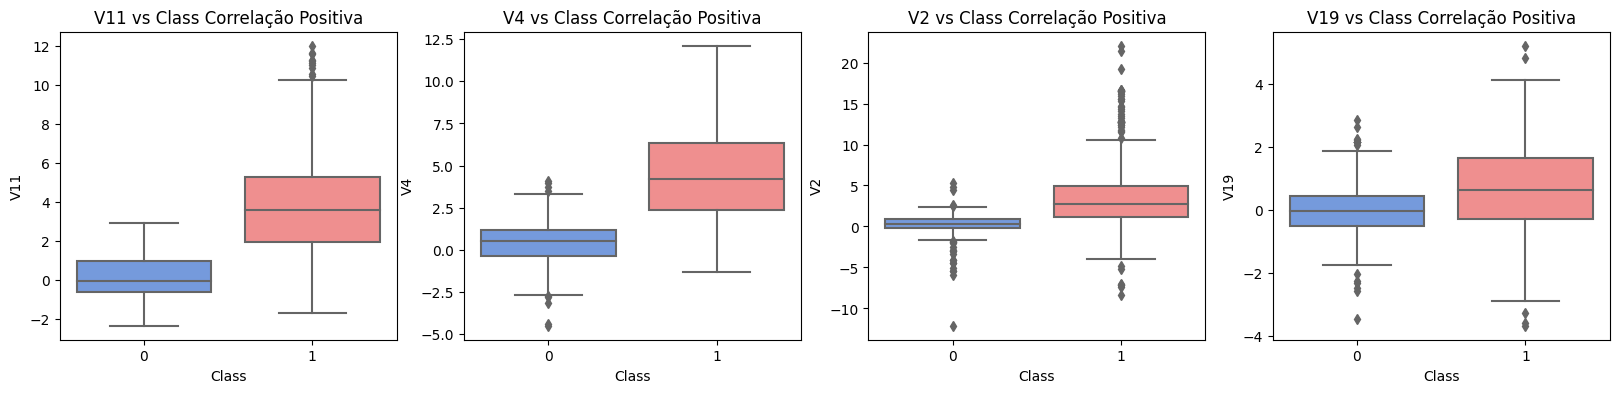

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Correlação Positiva')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Correlação Positiva')

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Correlação Positiva')

sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Correlação Positiva')

plt.show()

## Detecção de Anomalias:

Nosso principal objetivo nesta seção é remover "valores extremos" de características que têm alta correlação com nossas classes. Isso terá um impacto positivo na precisão de nossos modelos. <br><br>

### Método do Intervalo Interquartil:
<ul>
<li> <b>Intervalo Interquartil (IQR): </b> Calculamos isso pela diferença entre o percentil 75 e o percentil 25. Nosso objetivo é criar um limiar além do percentil 75 e abaixo do percentil 25 para que, caso alguma instância ultrapasse esse limiar, a instância seja excluída.  </li>
<li> <b>Gráficos de caixa (boxplots): </b> Além de ver facilmente os percentis 25 e 75 (ambos os extremos dos quadrados), também é fácil identificar valores extremos (pontos além dos extremos inferior e superior). </li>
</ul>
Compromisso na Remoção de Valores Extremos:
Devemos ter cuidado em até onde queremos definir o limiar para remover os valores extremos. Determinamos o limiar multiplicando um número (por exemplo, 1,5) pelo Intervalo Interquartil. Quanto maior for esse limiar, menos valores extremos serão detectados (multiplicando por um número maior, por exemplo, 3), e quanto menor for esse limiar, mais valores extremos serão detectados. <br><br>

**O Compromisso: **
Quanto menor for o limiar, mais valores extremos serão removidos, no entanto, queremos nos concentrar mais em "valores extremos" do que apenas em valores atípicos. Por quê? Porque corremos o risco de perda de informações que podem resultar em uma menor precisão de nossos modelos. Você pode ajustar esse limiar e ver como ele afeta a precisão de nossos modelos de classificação.

### Resumo:
<ul>
<li> <b>Visualizar Distribuições: </b> Começamos visualizando a distribuição da característica que usaremos para eliminar alguns dos valores extremos. A característica V14 é a única que tem uma distribuição gaussiana em comparação com as características V12 e V10. </li>
<li><b>Determinar o limiar: </b> Após decidirmos qual número usaremos para multiplicar pelo IQR (menor valor, mais valores extremos removidos), procedemos determinando os limiares inferior e superior, subtraindo q25 - limiar (limite inferior extremo) e adicionando q75 + limiar (limite superior extremo). </li>
<li> <b>Exclusão Condicional: </b> Por fim, criamos uma exclusão condicional afirmando que se o "limiar" for excedido em ambos os extremos, as instâncias serão removidas. </li>
<li> <b>Representação por Boxplot: </b> Visualizamos por meio do boxplot que o número de "valores extremos" foi reduzido a uma quantidade considerável. </li>

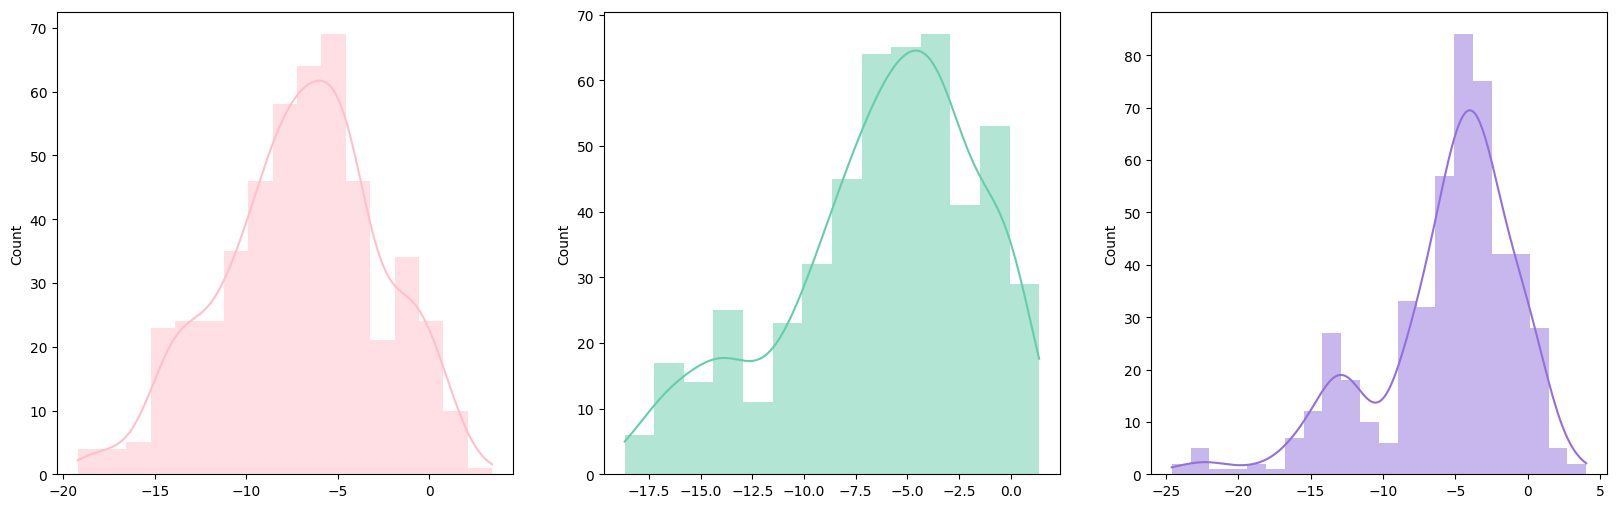

In [44]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

colors = ['#FFC0CB', '#66CDAA', '#9370DB']

sns.histplot(new_df['V14'].loc[new_df['Class'] == 1].values, ax=ax1, kde=True, color=colors[0], edgecolor=None)

sns.histplot(new_df['V12'].loc[new_df['Class'] == 1].values, ax=ax2, kde=True, color=colors[1], edgecolor=None)

sns.histplot(new_df['V10'].loc[new_df['Class'] == 1].values, ax=ax3, kde=True, color=colors[2], edgecolor=None)

plt.show()